In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('datasets/Restaurant_reviews.tsv' , delimiter= '\t')
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

In [4]:
dataset['length'] = [len(t) for t in dataset.Review]
dataset.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [5]:
dataset[dataset.length < 15].head()

,Review,Liked,length
9,A great touch.,1,14
39,Service sucks.,0,14
109,Sooooo good!!,1,13
114,Good prices.,1,12
115,Check it out.,1,13


Overall Distribution of the length of the reviews under each sentiment class

In [6]:
# fig,ax = plt.subplots(figsize=(5,5))
# plt.boxplot(dataset.length)
# plt.show()

In [7]:
# Cleaning the text (Basically We are removing non-determiners and stemming)
# stopwords is a list of unwanted words like the,and,of,etc...
# corpus is a collection of text.
import re                          # Regular Expression
import nltk                        # natural language tool kit - Used for processing of natutal languages i.e., human languages
# un comment nltk.download('stopwords') if you're running for the first time
#nltk.download('stopwords')         # Download stopwords from nltk
#stopwords_location = 'C:\\Users\\Ankit Sharma\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'
from nltk.corpus import stopwords
#We'll be performing stemming now
from nltk.stem.porter import PorterStemmer
#ps = PorterStemmer()               # Object of PorterStemmer class
#words = stopwords.words('english')
corpus = []                        # Initialize an empty list for all reviews

# Iterating through all the reviews
for i in range(0,1000):
    # Removing unnecessary punctuations and numbers except letters and replacing removed words with space.
    #review = re.sub('[^a-zA-Z]', ' ', dataset.Review[i])
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    # converting review to lowercase
    review = review.lower()
    # Converting review to list(of Strings)
    review  = review.split()
    ps = PorterStemmer()
    words = stopwords.words('english')
    words.remove('not')
    words.remove('no')
    words.remove('but')
    words.remove('is')
    # Loop through all words and keep those which are not in stopwords list.
    # set is much faster than a list and is considered when the review is very large eg. an article,a book
    review = [ps.stem(word) for word in review if not word in set(words)]
    # Joining back the review list to a string with each word seperated by a space.
    review = ' '.join(review)
    corpus.append(review)

In [8]:
stopwords_ = list(words)
print(stopwords_)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'c

In [9]:
corpus

['wow love place',
 'crust is not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier no care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock no sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place is not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic is also cute',
 'could care less interior is beauti',
 'perform',
 'right red velvet cake ohhh stuff is good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer is decent 

In [10]:
corpus[120]

'know place manag serv blandest food ever eaten prepar indian cuisin'

#### Applying PCA

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1566)
#X = cv.fit_transform(corpus)                          
X = cv.fit_transform(corpus).toarray()                 # toarray() is used to convert into matrix
y = dataset.iloc[:,1].values

In [12]:
X[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
y[0:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 25)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None) # since we do not know how many eigenvectors
# are needed we keep the value of n_components = None so that we can the
# find eigenvalues of all the eigenvectors to figure out the best one
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[3.31156599e-02 2.42699766e-02 2.06561296e-02 1.77993970e-02
 1.64186017e-02 1.48194313e-02 1.43521507e-02 1.29618559e-02
 1.11836512e-02 1.07811660e-02 9.76723672e-03 9.07488876e-03
 8.24169832e-03 7.73625171e-03 7.67668319e-03 7.39127189e-03
 7.19352640e-03 6.98043272e-03 6.86316056e-03 6.71397209e-03
 6.62229503e-03 6.43254790e-03 6.16985031e-03 6.00621059e-03
 5.83363133e-03 5.65387938e-03 5.59469185e-03 5.54754856e-03
 5.42099390e-03 5.40778196e-03 5.29478182e-03 5.24541592e-03
 5.21241724e-03 5.03904040e-03 4.97913430e-03 4.94548245e-03
 4.88141174e-03 4.80354461e-03 4.72760389e-03 4.63852732e-03
 4.62917156e-03 4.55720384e-03 4.54399060e-03 4.43280782e-03
 4.33597655e-03 4.27072417e-03 4.25756174e-03 4.21268171e-03
 4.15782151e-03 4.13859282e-03 4.05164305e-03 3.98909249e-03
 3.96308703e-03 3.93678319e-03 3.85843251e-03 3.84230845e-03
 3.81244454e-03 3.72325541e-03 3.69452611e-03 3.66894421e-03
 3.62851783e-03 3.61528183e-03 3.54358272e-03 3.52449815e-03
 3.48561598e-03 3.438976

In [16]:
len(explained_variance)

900

In [17]:
sum = 0
ev = list(explained_variance)
for e in range(len(ev)-200):
    sum = ev[e] + sum

In [18]:
sum

0.9940586370359565

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=560) # since we do not know how many eigenvectors
# are needed we keep the value of n_components = None so that we can the
# find eigenvalues of all the eigenvectors to figure out the best one
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [20]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

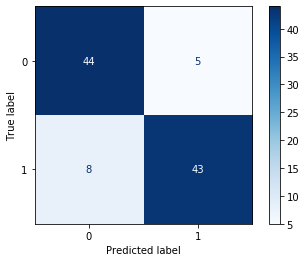

[[44  5]
 [ 8 43]]
Accuracy Score:  0.87


In [22]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix
plot_confusion_matrix(clf,X_test , y_test, cmap = plt.cm.Blues)
plt.show()
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: ',accuracy)